In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# load Dataset

data=pd.read_csv('Data/world_population.csv')

In [5]:
data.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
# Data PreProcessing

# check for missing values
print(data.isna().sum())

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [7]:
# Remove rows withj missing values
data_cleaned = data.dropna()

In [8]:
print(data.isna().sum())

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [9]:
# convert population columns to numeric, ignoring error
pupulation_columns =['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
data_cleaned[pupulation_columns] = data_cleaned[pupulation_columns].apply(pd.to_numeric, errors='coerce')


In [10]:
data_cleaned

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [11]:
# create a new feature: growth rate between 2022 and 2020
data_cleaned['growth_rate_2020_2022'] = ((data_cleaned['2022 Population'] - data_cleaned['2020 Population']) / data_cleaned['2020 Population']) * 100


In [12]:
# Drop rows with NaN growth rates (if applicable)
data_cleaned.dropna(subset=['growth_rate_2020_2022'], inplace=True)

# Display cleaned data
print(data_cleaned.head())

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

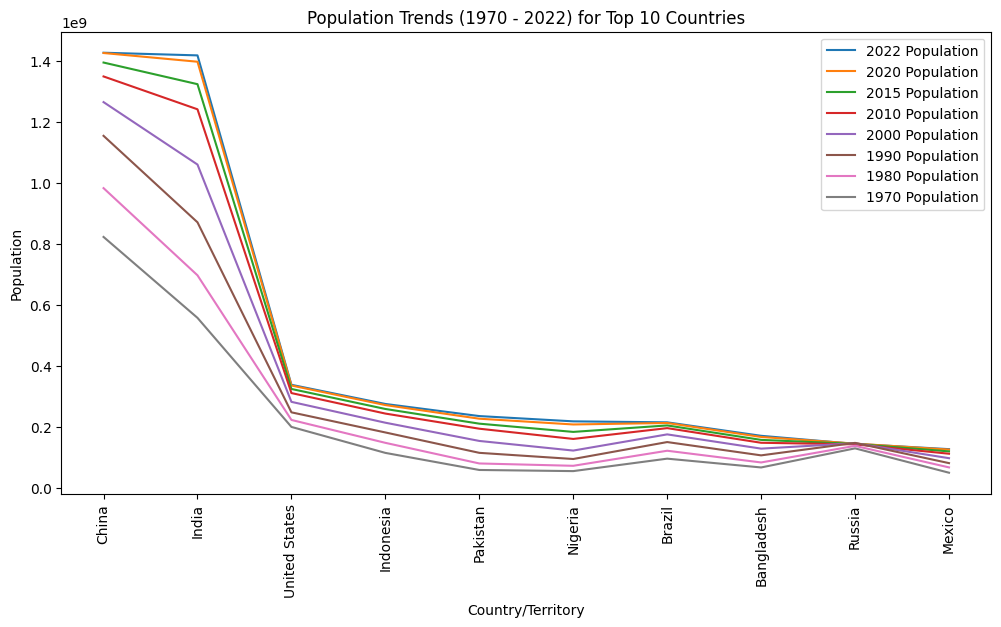

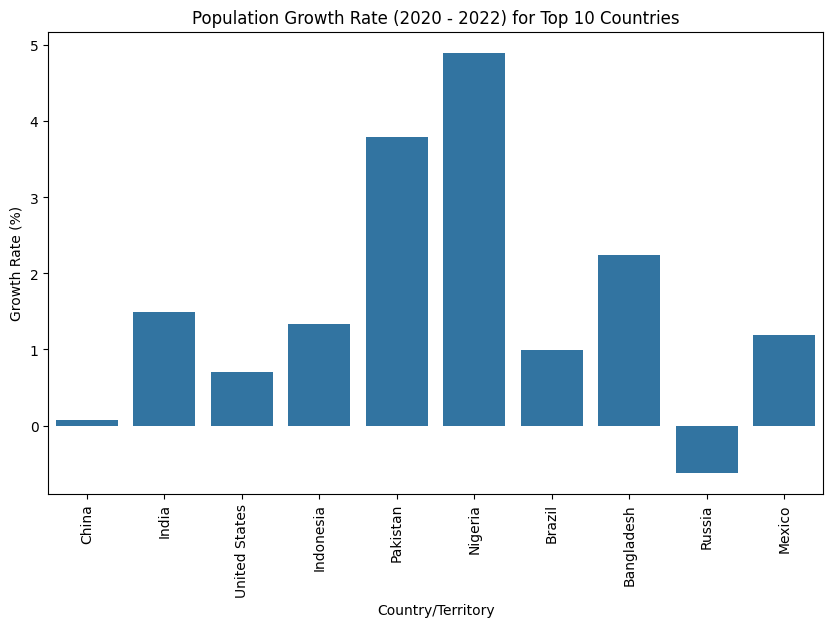

In [13]:
# Visualize population trends over time for top countries
top_countries = data_cleaned.nlargest(10, '2022 Population')

plt.figure(figsize=(12, 6))
for col in pupulation_columns:
    plt.plot(top_countries['Country/Territory'], top_countries[col], label=col)

plt.title('Population Trends (1970 - 2022) for Top 10 Countries')
plt.xlabel('Country/Territory')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Visualize population growth rate
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Territory', y='growth_rate_2020_2022', data=top_countries)
plt.title('Population Growth Rate (2020 - 2022) for Top 10 Countries')
plt.xlabel('Country/Territory')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Select features and target
X = data_cleaned[['2020 Population', '2015 Population', '2010 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate']]
y = data_cleaned['2022 Population']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature scaling (if required)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Optionally, you can print actual vs predicted results
print("Actual vs Predicted:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


Mean Squared Error (MSE): 329990771329.7123
R² Score: 0.9998990267663498
Actual vs Predicted:
        Actual     Predicted
69      304557  4.926952e+05
206   71697030  7.128843e+07
180      33660 -7.979591e+04
9      2780469  2.618293e+06
127     367507  2.351046e+05
109    6630623  6.699005e+06
196   47558630  4.736602e+07
93   275501339  2.751763e+08
213   85341241  8.533668e+07
15     1472233  1.505998e+06
224   34627652  3.451271e+07
55    99010212  9.883891e+07
227   28301696  2.708988e+07
30     6781953  6.507852e+06
201    8740472  8.699679e+06
147    6948392  6.983377e+06
19    11655930  1.156068e+07
112    5489739  4.879524e+06
225     326740  5.129897e+05
24    12224110  1.226263e+07
208    8848699  8.997149e+06
10      106445  1.162770e+04
95    44496122  4.444160e+07
144   17564014  1.741906e+07
220   67508936  6.724059e+07
25     3233526  2.983275e+06
86      808726  7.835182e+05
183   17316449  1.746075e+07
84    13859341  1.400775e+07
18     9534954  9.380977e+06
146    

Mean Squared Error: 329990771329.7123
R² Score: 0.9998990267663498


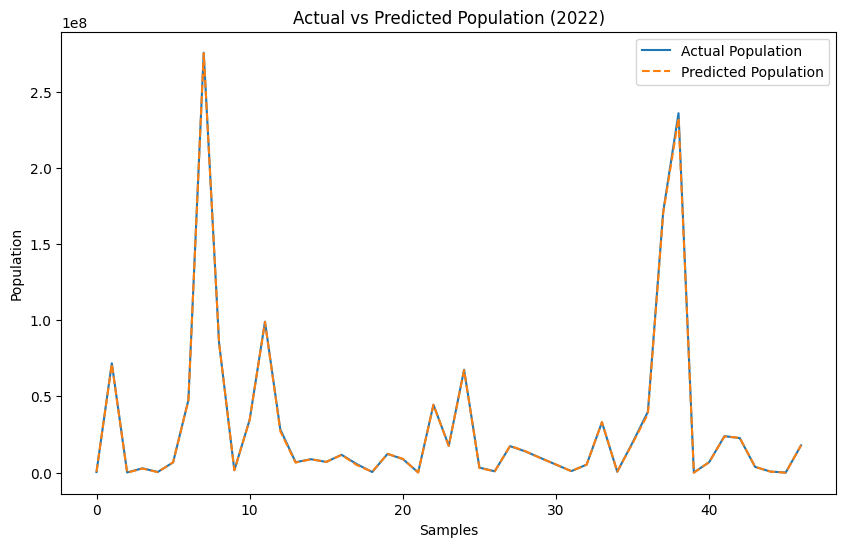

In [18]:
# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Compare actual vs predicted population
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Population')
plt.plot(y_pred, label='Predicted Population', linestyle='--')
plt.title('Actual vs Predicted Population (2022)')
plt.xlabel('Samples')
plt.ylabel('Population')
plt.legend()
plt.show()


In [19]:
import joblib
import os
if not os.path.exists('world_model'):
    os.makedirs('world_model')

# Save the model
joblib.dump(model, 'world_model/population_model.pkl')


joblib.dump(scaler,'model/scaler.pkl')

['model/scaler.pkl']